# **Gesture Based UI**
### Machine Learning - Models
---
#### Ryan Harte (G00338424)
---

## **Table of Contents**

1. [Introduction](#intro)
2. [Data Loading](#dataloading)
   - [Initial Data Setup](#dataframework)
3. [Establish the Data Framework and Data Cleaning/Preparation](#datacleaning)
4. [Classification Choice - Driving Style](#drivingstyle)
5. [Preparing Categorical Data for Modeling](#preparing-categorical-data-for-modeling)
6. [Data Splitting and Feature Scaling](#data-splitting-and-feature-scaling)
   -  [Data Splitting and StandardScaler](#data-splitting-and-standardscaler)
7. [K-Fold Cross Validation](#k-fold-cross-validation)
8. [Expanded Model Performance](#expanded-model-performance)

<a id="intro"></a>

## **Introduction**
This project aims to analyze vehicle sensor data to classify driving styles using machine learning algorithms. We will compare the performance of three classification algorithms: Support Vector Machine (SVM), Logistic Regression, and k-Nearest Neighbors (kNN) on datasets collected from two vehicle models, Opel Corsa and Peugeot 207. The objective of this project is to employ the data to classify driving styles, road surface conditions, or traffic congestion levels.

The raw dataset comes from Kaggle

<a id="dataloading"></a>

## **Data Loading**

The first task here is to prepare the datasets for further analysis and comparison across three classification algorithms (SVM, Logistic Regression and kNN). The focus at this stage is to ensure the integrity and suitability of the data for subsequent processing steps.

In [4]:
import pandas as pd

# Load datasets
opel_corsa_01 = pd.read_csv('spreadsheets/opel_corsa_01.csv', delimiter=';')
opel_corsa_02 = pd.read_csv('spreadsheets/opel_corsa_02.csv', delimiter=';')
peugeot_207_01 = pd.read_csv('spreadsheets/peugeot_207_01.csv', delimiter=';')
peugeot_207_02 = pd.read_csv('spreadsheets/peugeot_207_02.csv', delimiter=';')

# Display the first few rows of one dataset
opel_corsa_01.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


<a id="dataframework"></a>

### **Initial Data Setup**

The above code segment executes the initial step of data loading. It utilizes the **Pandas library** in Python. The **read_csv** function is used to import data from the four CSV files into **DataFrame objects**. Each file contains data from a different journey of two distinct vehicle models (Opel Corsa and Peugeot 207).

Given that the delimiter used in the CSV files is a semicolon, this character is specified explicitly in the function call to correctly parse the data. Once loaded, a quick inspection of the first dataset is conducted using the **head()** function on the DataFrame named opel_corsa_01, and so on. This function also returns the first five rows of data in the CSV file by default, offering an immediate look into the dataset structure, which encompasses various vehicle sensor measurements.

The above code segment forms the foundation for data analysis, addressing the essential task of data loading.



<a id="datacleaning"></a>

## **Establishing the Data Framework and Data Cleaning/Preparation**

The next step in getting the data ready for analysis involves combining data from the four separate .csv files. This process uses a simple method to put all this information into one big dataset for easier handling. 

Upon loading the data, we combine all individual datasets into a single **DataFrame** named **all_data** for comprehensive analysis, as is seen below code.

The DataFrame all_data is crucial for analysis as it contains the information from the CSV files. To ensure the structure and content of our datasets is correct, an initial inspection is conducted with the head() function on the combined DataFrame. This step provides insight into the variety of sensor measurements and forms the foundation for subsequent data processing and machine learning steps.


In [5]:
# Concatenate all datasets
all_data = pd.concat([opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02])

# Replace decimal commas with dots and handle missing values
all_data = all_data.replace(',', '.', regex=True).bfill()

# Convert columns to appropriate data types
for col in all_data.select_dtypes(include=['object']).columns:
    all_data[col] = pd.to_numeric(all_data[col], errors='ignore')

**1. Concatenating Datasets:** 
The first line uses Pandas' concat function to merge the four DataFrame objects (opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02) into a single DataFrame named all_data. This step is crucial for creating a comprehensive dataset that includes all available data points from the two vehicle models across both journeys, facilitating a unified analysis approach.

**2. Replacing Decimal Commas with Dots and Handling Missing Values:** The second line addresses two common issues in data preprocessing: the format inconsistency and missing data.
- The **replace** function is employed with **regex=True** to globally replace all commas (,) with dots (.), which is the standard decimal separator in many programming environments, including Python. This ensures that numerical data is recognized correctly by Python.
- Following the replacement, the **fillna** method with the **'bfill()'** argument is used to fill in missing values. This method backfills, meaning it replaces missing values with the next available non-null value in the DataFrame. It's a strategy to handle missing data without losing rows, especially when subsequent data points could serve as reasonable proxies for missing ones.

**3. Converting Columns to Appropriate Data Types:** 
The for loop iterates over all columns of **_all_data** that are recognized as object types (usually strings) and attempts to convert them to numeric data types using the **pd.to_numeric** function. The **errors='ignore'** argument means that if conversion fails for any data point (because it cannot be translated into a number), the original value is retained, and the data type of that column remains as an object. This step is essential for ensuring that all numerical data is in a format that can be used for calculations and modeling. This enhances the dataset's compatibility with various data analysis and machine learning algorithms.

## **Classification Choice: Driving Style**

There are three classification choices in the dataset: 
The actual columns in the dataset relevant to the classification task are named as follows:

**1: roadSurface:** SmoothCondition or UnevenCondition or FullOfHolesCondition<br>
**2: traffic** LowCongestionCondition or NormalCongestionCondition	or HighCongestionCondition	<br>
**3: drivingStyle** EvenPaceStyle or AggressiveStyle

The classification choice this project will focus on is **driving styles**. Driving styles are categorized into two types: **EvenPaceStyle** and **Aggressive Style**. 

- **Even Pace Style:** represents a driving behavior characterized by consistent speed, smooth accelerations, and decelerations. This style is typically associated with safer driving practices.

- **Aggressive Style:** is marked by rapid changes in speed, frequent and abrupt accelerations, and decelerations. This style indicates a more erratic and potentially riskier driving behavior.

This projects analysis aims to distinguish between these two styles using vehicle sensor data from Kaggle.

In [6]:
# Filter and display sample data for both Even Pace Style and Aggressive Style
even_pace_data = all_data[all_data['drivingStyle'] == 'EvenPaceStyle'].sample(5)
aggressive_data = all_data[all_data['drivingStyle'] == 'AggressiveStyle'].sample(5)

print("Sample data for Even Pace Style:")
display(even_pace_data)

print("\nSample data for Aggressive Style:")
display(aggressive_data)

Sample data for Even Pace Style:


,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
2087,2264,1.700012,38.055420,22.855769,383.917693,2.476978,-1.0900,69.803925,81.0,161.0,1859.0,32.750000,19.0,0.5390,15.208708,SmoothCondition,LowCongestionCondition,EvenPaceStyle
5402,5647,-1.299999,49.500000,41.504999,39.761156,-0.899998,1.1259,0.000000,79.0,108.0,1425.5,17.379999,29.0,-1.0336,12.907846,UnevenCondition,LowCongestionCondition,EvenPaceStyle
1787,1887,1.099998,41.399998,53.339999,58.975323,-0.900002,1.8968,34.117649,57.0,103.0,788.5,5.690000,18.0,-1.3911,14.780546,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
61,120,0.099976,62.600033,52.346842,222.638058,0.900711,0.6133,43.921570,76.0,133.0,2009.0,21.590000,19.0,-0.1641,13.767596,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2662,2731,0.900002,14.400000,31.094999,432.112315,6.300000,1.3655,47.058823,78.0,103.0,983.0,6.830000,37.0,0.0238,9.175380,SmoothCondition,NormalCongestionCondition,EvenPaceStyle



Sample data for Aggressive Style:


,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
3754,4049,-1.599976,47.062618,17.275058,418.230362,-4.503605,-0.6953,0.000000,81.0,107.0,1572.0,19.920000,11.0,0.4804,17.285917,SmoothCondition,LowCongestionCondition,AggressiveStyle
308,352,-0.200012,18.464760,10.703556,31.068989,0.675539,6.8573,0.000000,67.0,107.0,1450.0,11.180000,19.0,17.4019,21.686924,SmoothCondition,HighCongestionCondition,AggressiveStyle
3449,3744,2.400024,27.922319,49.291901,201.781993,-3.377697,0.1250,10.196078,67.0,114.0,2128.0,21.760000,12.0,-0.0078,13.054382,SmoothCondition,LowCongestionCondition,AggressiveStyle
1319,1388,0.700005,44.099998,91.474136,627.130349,1.799999,2.4932,78.823532,79.0,117.0,1329.0,17.190001,38.0,-2.4301,10.456524,SmoothCondition,LowCongestionCondition,AggressiveStyle
1862,1931,1.300003,1.800000,18.990000,129.317181,-1.800000,2.2638,29.803923,80.0,102.0,747.5,4.220000,37.0,-2.0206,14.138495,UnevenCondition,LowCongestionCondition,AggressiveStyle


## **Preparing Categorical Data for Modeling**
When dealing with categorical data, like different types of driving styles or road conditions, we can't directly use them in most machine learning models because they expect numbers, not words or strings. This is where one-hot encoding comes into play. It converts categories into columns of 1s and 0s, making our data model ready to rock and roll.

In [7]:
# Identify and transform categorical columns
categorical_cols = all_data.select_dtypes(include=['object']).columns
all_data_encoded = pd.get_dummies(all_data, columns=categorical_cols)

This code first identifies all **columns** in **all_data** that contain non-numeric object types, which are our categorical variables. The **pd.get_dummies()** method creates a new **DataFrame (all_data_encoded)**, where each categorical value is represented by a new column. 

For example, in handling "drivingStyle" with "Even Pace Style" and "Aggressive Style", one-hot encoding transforms this column into two columns: "drivingStyle_Even Pace Style" and "drivingStyle_Aggressive Style". Each row will have a 1 in the column that matches its original driving style, and a 0 in the other, clearly marking the presence of each driving behavior.

This is necessary for **feature scaling** because machine learning algorithms perform better when numerical input variables are on the same scale. The **StandardScaler** in scikit-learn standardizes features by removing the mean and scaling to unit variance. This ensures that all features contribute equally to the model's performance. This is explained further in the next section.

## **Data Splitting and Feature Scaling**

In preparing the data for model training, it's crucial to check if **feature scaling** is needed. No single feature should outweigh the others simply because of its larger numerical range. 

_Perfectly balanced, as all things should be... - Thanos_ 

Algorithms like SVM and kNN can be particularly sensitive to this imbalance, as they rely on measuring distances between data points. By scaling features to a similar range, we ensure a fair comparison, potentially leading to more accurate and reliable model predictions.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable from the encoded DataFrame
X = all_data_encoded.drop(['drivingStyle_AggressiveStyle', 'drivingStyle_EvenPaceStyle'], axis=1)
y = all_data_encoded['drivingStyle_EvenPaceStyle']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data with the same scaler
X_test_scaled = scaler.transform(X_test)

#### **Data Splitting and StandardScaler**

**1. Data Separation:**

- The X variable holds our features, which are all the columns except for the "drivingStyle_AggressiveStyle" and "drivingStyle_EvenPaceStyle" columns.
- The y variable represents our target variable, specifically the "drivingStyle_EvenPaceStyle" column.

**2. Data Splitting:**

- The train_test_split function divides our dataset into training and testing sets.
- We allocate 70% of the data to training (X_train and y_train) and 30% to testing (X_test and y_test).
The random_state=42 argument ensures reproducibility of the split.

**3. Feature Scaling - Standardization:**

- We use **StandardScaler** to standardize the features in our training data (X_train).
- **Standardization** modifies our features so that they possess a mean value of 0 and a standard deviation of 1. This adjustment ensures that all features are on a similar scale, which supports both the convergence of our model and the improvement of its performance.
 
**4. Scaling the Test Data:**

- We apply the same scaling transformation to the testing data (X_test) using the scaler fitted on the training data.
- This ensures consistency in the scaling process across both training and testing datasets.

In [9]:
# Prints the column names to verify the encoded drivingStyle column names
print(all_data_encoded.columns)

Index(['Unnamed: 0', 'AltitudeVariation', 'VehicleSpeedInstantaneous',
       'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation',
       'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature',
       'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow',
       'IntakeAirTemperature', 'VerticalAcceleration',
       'FuelConsumptionAverage', 'roadSurface_FullOfHolesCondition',
       'roadSurface_SmoothCondition', 'roadSurface_UnevenCondition',
       'traffic_HighCongestionCondition', 'traffic_LowCongestionCondition',
       'traffic_NormalCongestionCondition', 'drivingStyle_AggressiveStyle',
       'drivingStyle_EvenPaceStyle'],
      dtype='object')


## **K-Fold Cross Validation**

K-fold cross-validation is a statistical method used to estimate the skill of machine learning models. It divides the dataset into **k** smaller sets, training the model on **k-1** of these sets and testing on the remaining set. This process is repeated **k** times, with each subset used exactly once as the test set. The results from the **k** iterations are then averaged to produce a single performance metric.

### **Advantages of K-Fold Cross-validation**

K-fold cross-validation offers several advantages over traditional train/test split methods (method seen earlier), particularly in terms of model evaluation and selection:

- **Model Generalization:** It provides a more accurate measure of how well models generalize to unseen data. K-Fold cross-validation evaluates the model's performance across multiple points, reducing bias associated with the random selection of train/test splits.
- **Robustness:** It reduces the variability and dependence on the particular way the data is split. In a single train/test split, the results can vary significantly depending on which data points end up in the training set and which in the test set. K-fold cross-validation averages the performance across different folds, mitigating this issue and providing a more stable estimate of model performance.
- **Efficiency:** Every data point is used for both training and testing (though in separate iterations), making full use of the available data. This is particularly beneficial in situations where the dataset is limited or expensive to obtain.


#### **Cross Validation Without Feature Scaling**

The models below are evaluated without feature scaling. This approach provides a baseline to understand how each model performs with the raw data. It's crucial to note that not scaling features can impact the performance and convergence of some models.

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Instantiate classifiers
svm_model = SVC()
logistic_model = LogisticRegression(max_iter=10000, solver='saga') 
knn_model = KNeighborsClassifier()

# Initialize K-Fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross Validation for SVM with no feature scaling
svm_cv_results = cross_val_score(svm_model, X, y, cv=kfold, scoring='accuracy')
print("SVM Cross Validation Results (NO FEATURE SCALING):")
print("Mean Accuracy:", svm_cv_results.mean())

# Perform K-Fold Cross Validation for Logistic Regression with no feature scaling
logistic_cv_results = cross_val_score(logistic_model, X, y, cv=kfold, scoring='accuracy')
print("\nLogistic Regression Cross Validation Results (NO FEATURE SCALING):")
print("Mean Accuracy:", logistic_cv_results.mean())

# Perform K-Fold Cross Validation for kNN with no feature scaling
knn_cv_results = cross_val_score(knn_model, X, y, cv=kfold, scoring='accuracy')
print("\nk-Nearest Neighbors (kNN) Cross Validation Results (NO FEATURE SCALING):")
print("Mean Accuracy:", knn_cv_results.mean())

SVM Cross Validation Results (NO FEATURE SCALING):
Mean Accuracy: 0.8839537329127236

Logistic Regression Cross Validation Results (NO FEATURE SCALING):
Mean Accuracy: 0.8813459516298634

k-Nearest Neighbors (kNN) Cross Validation Results (NO FEATURE SCALING):
Mean Accuracy: 0.9073396424815983


- **SVM Cross Validation (No Feature Scaling):** First, the SVM model's performance is assessed. The mean accuracy across the folds provides insight into how well the model generalizes to new data.

- **Logistic Regression Cross Validation (No Feature Scaling):** Logistic Regression is evaluated, setting **max_iter** to 10,000 to allow the model enough iterations to converge on an optimal solution. The **solver** used is **'saga'**, an algorithm designed for large datasets. Despite these tailored settings, the absence of feature scaling can still lead to convergence warnings.
  - **Example:** If the solver is removed and/or max_iter is set to < 10000, convergence warnings will appear.

- **kNN Cross Validation (No Feature Scaling):** Finally, the kNN model's performance is evaluated. This model's sensitivity to feature scale is a critical factor in its accuracy as is seen later in the project.

#### **Cross Validation With Feature Scaling**

**Implementing Feature Scaling:**
Feature scaling standardizes the input features to have a mean of 0 and a standard deviation of 1. This process is crucial for models that are sensitive to the scale of the data, helping improve model performance and convergence.

After applying **feature scaling** through **StandardScaler**, the models are re-evaluated. This section compares the performance of the models previously with the models now implemented with feature scaling.

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Instantiate classifiers
svm_model = SVC()
logistic_model = LogisticRegression(max_iter=10000) 
knn_model = KNeighborsClassifier()

# Initialize K-Fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross Validation for SVM with feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_cv_results = cross_val_score(svm_model, X_scaled, y, cv=kfold, scoring='accuracy')
print("SVM Cross Validation Results:")
print("Mean Accuracy:", svm_cv_results.mean())

# Perform K-Fold Cross Validation for Logistic Regression with feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logistic_cv_results = cross_val_score(logistic_model, X_scaled, y, cv=kfold, scoring='accuracy')
print("\nLogistic Regression Cross Validation Results:")
print("Mean Accuracy:", logistic_cv_results.mean())

# Perform K-Fold Cross Validation for kNN with feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn_cv_results = cross_val_score(knn_model, X_scaled, y, cv=kfold, scoring='accuracy')
print("\nk-Nearest Neighbors (kNN) Cross Validation Results:")
print("Mean Accuracy:", knn_cv_results.mean())

SVM Cross Validation Results:
Mean Accuracy: 0.8945951629863302

Logistic Regression Cross Validation Results:
Mean Accuracy: 0.883154574132492

k-Nearest Neighbors (kNN) Cross Validation Results:
Mean Accuracy: 0.9243743427970557


- **SVM Cross Validation (With Feature Scaling):** The impact of scaling on SVM's performance is examined. Given SVM's sensitivity to feature scales, an improvement of 0.01064143007.

- **Logistic Regression Cross Validation (With Feature Scaling):** The evaluation of Logistic Regression with scaled features is crucial, as feature scaling can significantly impact its convergence and overall performance. An improvement of 0.0018086225.

- **kNN Cross Validation (With Feature Scaling):** Lastly, the effect of feature scaling on kNN's accuracy is assessed. Since kNN calculates distances between instances, scaling has enhanced its predictive capability. An improvement of 0.01703470031.

## **Expanded Model Performance**

Evaluating model performance extends beyond mere accuracy. **Precision**, **Recall**, and the **F1 Score** offer a more nuanced view of a classifier's effectiveness, especially in scenarios where the balance between identifying true positives and the relevance of the prediction is crucial.

- **1. Precision:** This metric measures the accuracy of predictions for a specific driving style, such as Aggressive or Even Pace. It calculates the proportion of correctly identified instances out of all instances labeled as that style. High precision indicates a low rate of false positives in the predictions.
  
- **2. Recall:** This metric assesses the ability to capture all relevant instances of a particular driving style. It reflects the percentage of actual instances of a style, like Aggressive, correctly identified from the total actual instances of that style. High recall points to a low rate of false negatives.

- **F1 Score:** The F1 score combines precision and recall into a single metric, providing a balanced measure of both accuracy and completeness. It is particularly useful in scenarios where both the precision of correctly predicting a driving style and the recall of capturing all instances of that style are equally important. A high F1 score signifies effective balancing of precision and recall.

In [12]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define scoring metrics for evaluation
scoring_metrics = {'accuracy': 'accuracy',
                   'precision': 'precision',
                   'recall': 'recall',
                   'f1_score': 'f1'}

# Initialize models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'kNN': KNeighborsClassifier()
}

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize K-Fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through models and perform cross-validation
for name, model in models.items():
    cv_results = cross_validate(model, X_scaled, y, cv=kfold, scoring=scoring_metrics)
    print(f"{name} - Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
    print(f"{name} - Mean Precision: {np.mean(cv_results['test_precision'])}")
    print(f"{name} - Mean Recall: {np.mean(cv_results['test_recall'])}")
    print(f"{name} - Mean F1 Score: {np.mean(cv_results['test_f1_score'])}\n")

SVM - Mean Accuracy: 0.8945951629863302
SVM - Mean Precision: 0.8967349599445364
SVM - Mean Recall: 0.9953841547748687
SVM - Mean F1 Score: 0.9434849423234908

Logistic Regression - Mean Accuracy: 0.883154574132492
Logistic Regression - Mean Precision: 0.8883085489007065
Logistic Regression - Mean Recall: 0.9926275598737684
Logistic Regression - Mean F1 Score: 0.9375724644167669

kNN - Mean Accuracy: 0.9243743427970557
kNN - Mean Precision: 0.942978181751057
kNN - Mean Recall: 0.9733078138433143
kNN - Mean F1 Score: 0.9579011160840899



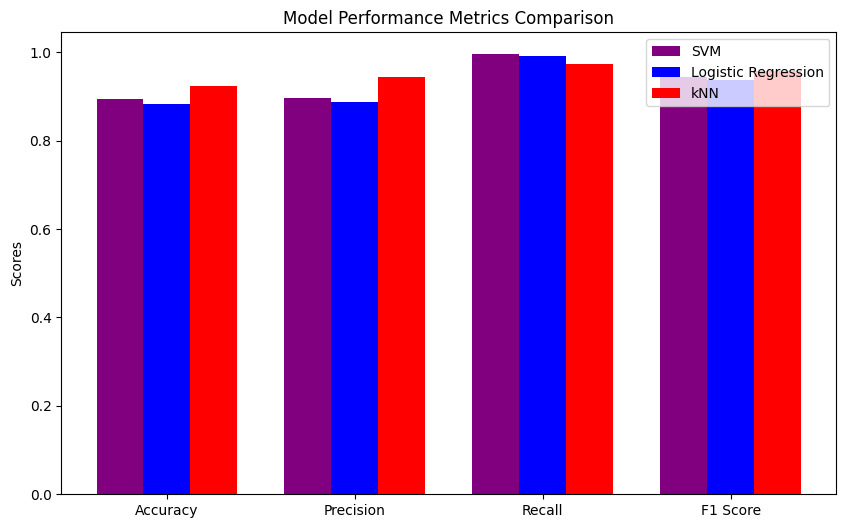

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Model names, metrics, and performance data
models = ['SVM', 'Logistic Regression', 'kNN']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
performance = [
    [0.8946, 0.8967, 0.9954, 0.9435],  # SVM
    [0.8832, 0.8883, 0.9926, 0.9376],  # Logistic Regression
    [0.9244, 0.9430, 0.9733, 0.9579]   # kNN
]
colors = ['purple', 'blue', 'red'] # Colors for each model

# Setup for plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # Bar width
positions = np.arange(len(metrics))  # Metric positions

# Plot each model's performance
for i, (model, scores) in enumerate(zip(models, performance)):
    ax.bar(positions + i*width, scores, width, label=model, color=colors[i])

# Finalizing the plot
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics Comparison')
ax.set_xticks(positions + width)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()